In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ca-test

/Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ca-test


In [3]:
os.listdir()

['.DS_Store',
 'ca-00.csv',
 'ca-01.csv',
 'ca-02.csv',
 'ca-03.csv',
 'ca-04.csv',
 'ca-05.csv',
 'ca-06.csv',
 'ca-07.csv',
 'ca-08.csv',
 'ca-09.csv',
 'ca-10.csv',
 'ca-11.csv',
 'ca-12.csv',
 'ca-13.csv',
 'ca-20.csv',
 'CCD-noise.csv',
 'water.csv']

In [4]:
datass = None
datass = []
for files in glob.glob("*.csv"):
    datass.append(files)
Cadat = datass[0:15]

In [5]:
data = dict()
dataf= dict()
datacut = dict()
intensity = dict()
leng = len(Cadat)
backg = pd.read_csv('CCD-noise.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
water = pd.read_csv('water.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
for x in range(0,leng):
    data[x] = pd.read_csv(Cadat[x],delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    data[x]['dif'] = data[x]['sig'].diff().abs()
    data[x]['BS'] = (data[x]['sig']-backg['sig'])
    dataf[x] = data[x][data[x]['dif']<.02]
    datacut[x] = dataf[x][(dataf[x]['wave']>490) & (dataf[x]['wave']<700)]
    intensity[x] = integrate.trapz(datacut[x]['BS'], datacut[x]['wave'])



In [6]:
intensity[10]/intensity[0]

291.83334666257571

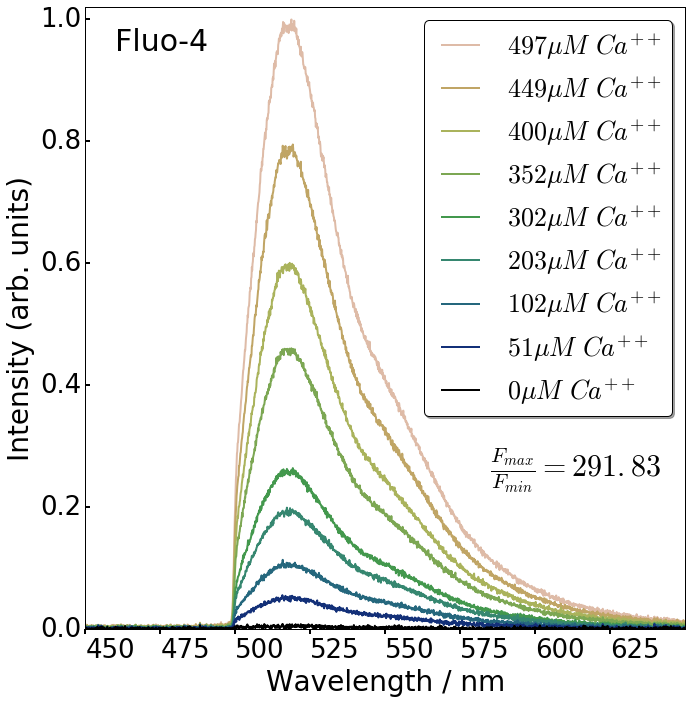

In [7]:
plt.figure(figsize=(10,10))
nor = max(dataf[10]['BS'])

plt.plot(dataf[10]['wave'],dataf[10]['BS']/nor,color=cm.gist_earth(80/90),label= r'$497 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[9]['wave'],dataf[9]['BS']/nor,color=cm.gist_earth(70/90),label= r'$449 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[8]['wave'],dataf[8]['BS']/nor,color=cm.gist_earth(60/90),label= r'$400 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[7]['wave'],dataf[7]['BS']/nor,color=cm.gist_earth(50/90),label= r'$352 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[6]['wave'],dataf[6]['BS']/nor,color=cm.gist_earth(40/90),label= r'$302 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[4]['wave'],dataf[4]['BS']/nor,color=cm.gist_earth(30/90),label= r'$203 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[2]['wave'],dataf[2]['BS']/nor,color=cm.gist_earth(20/90),label= r'$102 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[1]['wave'],dataf[1]['BS']/nor,color=cm.gist_earth(10/90),label= r'$51 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[0]['wave'],dataf[0]['BS']/nor,color=cm.gist_earth(0/90),label= r'$0 \mu M$'+' $Ca^{++}$',linewidth=2)

plt.text(460, .95, 'Fluo-4', fontsize=30)
plt.text(585, .25, r'$\frac{F_{max}}{F_{min}} = 291.83$', fontsize=30)
plt.xlabel(r'Wavelength / nm', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
#plt.title('Fluo-4 Calicum Induced Fluorescence', fontsize=32)
plt.legend(loc='upper right',fontsize=26,shadow=True, fancybox=True)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/Ar_Fluo4_ca_IF.pdf')
plt.show()

(490, 600)

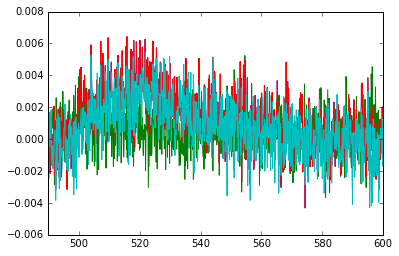

In [8]:
plt.plot(data[0]['wave'],data[0]['sig']-backg['sig'])
plt.plot(water['wave'],water['sig']-backg['sig'])
plt.plot(dataf[0]['wave'],dataf[0]['BS'])
plt.plot(data[0]['wave'],data[0]['sig']-water['sig'])

plt.xlim(490,600)

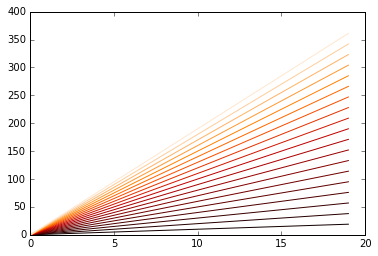

In [9]:
a = np.arange(0,20)

plt.figure()
for i in np.arange(20):
    c = cm.gist_heat(i/20)
    plt.plot(a,i*a,color=c)

plt.show()

In [10]:
inte = []
for a in range(0,15):
    inte.append(intensity[a])
inte
Fmax=max(inte)
Fmin=min(inte)
Fs = np.array((inte-Fmin)/(Fmax-inte))
Fs

array([  0.00000000e+00,   5.06072456e-02,   1.16193286e-01,
         1.54538356e-01,   2.38377103e-01,   3.52544804e-01,
         3.46557758e-01,   8.51713627e-01,   1.48806385e+00,
         3.82978325e+00,              inf,   1.11160860e+02,
         9.60963104e+01,   9.18612115e+01,   1.87979694e+01])

In [11]:
inte

[0.1297932567205613,
 1.9481062407954171,
 4.059299270235722,
 5.1825018629016375,
 7.3960034064682914,
 9.9689751271835654,
 9.8448864068151654,
 17.492446975743839,
 22.706280816466329,
 30.062285935065912,
 37.878000482996249,
 37.541446293433317,
 37.489229714327898,
 37.471499139756801,
 35.971329835350573]

In [12]:
xes = list(range(15))
bacon = []
for f in range(len(xes)):
    bacon.append((6.43e-3)*(4e-6)/(500e-6+(4e-6*xes[f])))
finalcon=np.array(np.cumsum(bacon)/1e-6)
finalcon = np.append(0,finalcon)
finalcon = finalcon[0:len(finalcon)-1]
finalcon

array([   0.        ,   51.44      ,  102.47174603,  153.10166729,
        203.33604229,  253.18100353,  302.64254199,  351.72651146,
        400.43863267,  448.78449733,  496.76957196,  544.39920159,
        591.67861335,  638.61291992,  685.20712282])

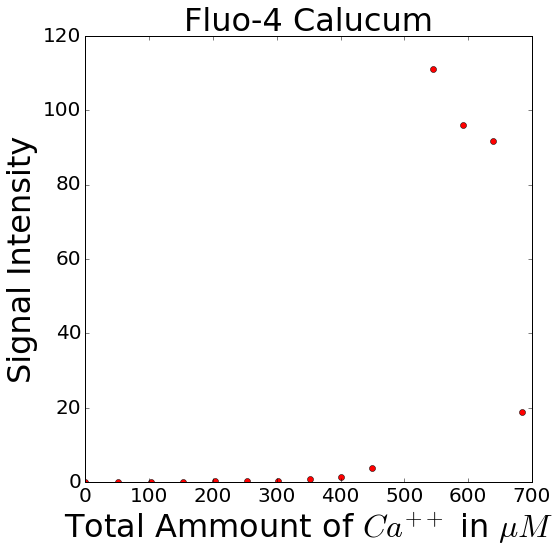

In [13]:
plt.figure(figsize=(8,8))
plt.plot(finalcon,Fs,'ro')
plt.xlabel(r'Total Ammount of $Ca^{++}$ in $\mu M$', fontsize=32)
plt.ylabel('Signal Intensity', fontsize=32)
plt.title('Fluo-4 Calucum', fontsize=32)
plt.tick_params(labelsize=20)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/Fluo4/Fluo4 Bakd.pdf')
plt.show()

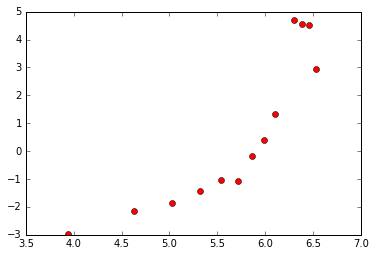

In [14]:
plt.plot(np.log(finalcon),np.log(Fs),'ro')

In [36]:
np.delete(Fs[9:12],1)

array([   3.82978325,  111.16085967])

In [37]:
Fs[9:12]

array([   3.82978325,           inf,  111.16085967])

In [38]:
ys =np.log(np.delete(Fs[9:12],1))
xs =np.log(finalcon[1:3])
fit = np.polyfit(xs,ys,1)
fun = np.poly1d(fit)
kd = np.exp(fun[0])/1e-9
kd

16.579498692837976

In [45]:
xs

array([ 3.94041608,  4.62958711])

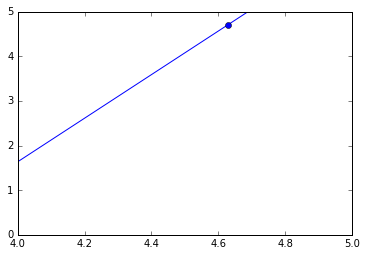

In [44]:
xvals = np.linspace(1.0, 15.0, num=500, endpoint=True)
plt.plot(xvals,(fun[1]*xvals+fun[0]))
plt.plot(np.log(finalcon),np.log(Fs),'ro')
plt.plot(xs,ys,'bo')
plt.ylim(0,5)
plt.xlim(4,5)
plt.show()

In [18]:
freeCa = kd*Fs
freeCa

array([  0.00000000e+00,   2.57139821e-03,   5.90388201e-03,
         7.85222842e-03,   1.21121481e-02,   1.79131084e-02,
         1.76089014e-02,   4.32763109e-02,   7.56098197e-02,
         1.94594621e-01,              inf,   5.64818006e+00,
         4.88273720e+00,   4.66754814e+00,   9.55141194e-01])

In [46]:
finalcon

array([   0.        ,   51.44      ,  102.47174603,  153.10166729,
        203.33604229,  253.18100353,  302.64254199,  351.72651146,
        400.43863267,  448.78449733,  496.76957196,  544.39920159,
        591.67861335,  638.61291992,  685.20712282])

In [47]:
print((335e-9)*Fs)

[  0.00000000e+00   1.69534273e-08   3.89247507e-08   5.17703493e-08
   7.98563294e-08   1.18102509e-07   1.16096849e-07   2.85324065e-07
   4.98501389e-07   1.28297739e-06              inf   3.72388880e-05
   3.21922640e-05   3.07735059e-05   6.29731976e-06]


In [9]:
data[2]
datass[2][0:5]

'ca-02'

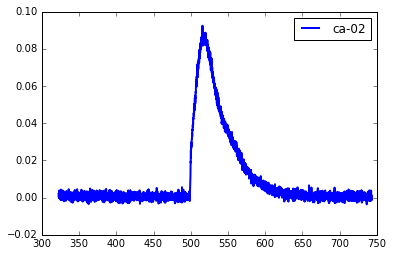

In [12]:
plt.plot(dataf[2]['wave'],dataf[2]['BS'],label= datass[2][0:5],linewidth=2)
plt.legend()


In [ ]:

leng = len(Cadat)
for x in range(0,leng):
    data[x] = pd.read_csv(Cadat[x],delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    data[x]['dif'] = data[x]['sig'].diff().abs()
    data[x]['BS'] = (data[x]['sig']-backg['sig'])
    dataf[x] = data[x][data[x]['dif']<.02]
    datacut[x] = dataf[x][(dataf[x]['wave']>490) & (dataf[x]['wave']<700)]
    intensity[x] = integrate.trapz(datacut[x]['BS'], datacut[x]['wave'])



In [13]:
a = ['000','111','222','333']

In [16]:
efield = None
efield = []
for x in range(0,4):
    efield.append(int(a[x]))
efield

[0, 111, 222, 333]